# 📊 Analyse et Visualisation des Données des Cours

Ce notebook présente une analyse complète du dataset des cours (`final_data.csv`).
Nous explorerons les distributions des catégories, des notes, de la popularité et d'autres mesures clés pour mieux comprendre les données de notre système de recommandation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
palette = sns.color_palette("viridis", as_cmap=False)

## 1. Chargement des Données

In [2]:
# Chargement du fichier CSV
df = pd.read_csv('../data/final_data.csv')

# Affichage des premières lignes
df.head()

,title,partner,rating,reviews,metadata,link,category,scraped_at,source_domain,num_ratings,duration_hours,level_enc,title_clean,popularity_score,id,price
0,Applied Machine Learning,Johns Hopkins University,3.5,14 reviews,Intermediate · Specialization · 3 - 6 Months,https://www.coursera.org/specializations/appli...,Machine Learning,2026-02-02T19:37:56.257182,coursera,14,40.0,2,applied machine learning,9.478176,0,Inscrivez-vous gratuitement
1,Machine Learning: Algorithms in the Real World,Alberta Machine Intelligence Institute,4.6,1.1K reviews,Intermediate · Specialization · 3 - 6 Months,https://www.coursera.org/specializations/machi...,Machine Learning,2026-02-02T19:38:08.726380,coursera,1100,40.0,2,machine learning algorithms in the real world,32.218281,1,Inscrivez-vous gratuitement
2,Databricks Machine Learning Fundamentals,Coursera,0.0,0 reviews,Intermediate · Course · 1 - 4 Weeks,https://www.coursera.org/learn/databricks-mach...,Machine Learning,2026-02-02T19:38:09.354762,coursera,0,10.0,2,databricks machine learning fundamentals,0.000000,2,Inscrivez-vous gratuitement
3,Introduction to Embedded Machine Learning,Edge Impulse,4.8,751 reviews,Intermediate · Course · 1 - 4 Weeks,https://www.coursera.org/learn/introduction-to...,Machine Learning,2026-02-02T19:38:09.420822,coursera,751,10.0,2,introduction to embedded machine learning,31.789134,3,Inscrivez-vous gratuitement
4,Machine Learning and Reinforcement Learning in...,New York University,3.7,820 reviews,Intermediate · Specialization · 3 - 6 Months,https://www.coursera.org/specializations/machi...,Machine Learning,2026-02-02T19:38:09.634971,coursera,820,40.0,2,machine learning and reinforcement learning in...,24.828936,4,Inscrivez-vous gratuitement


In [3]:
# Informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1983 non-null   object 
 1   partner           1983 non-null   object 
 2   rating            1983 non-null   float64
 3   reviews           1983 non-null   object 
 4   metadata          1983 non-null   object 
 5   link              1983 non-null   object 
 6   category          1983 non-null   object 
 7   scraped_at        1983 non-null   object 
 8   source_domain     1983 non-null   object 
 9   num_ratings       1983 non-null   int64  
 10  duration_hours    1983 non-null   float64
 11  level_enc         1983 non-null   int64  
 12  title_clean       1983 non-null   object 
 13  popularity_score  1983 non-null   float64
 14  id                1983 non-null   int64  
 15  price             1855 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory

## 2. Distribution des Catégories de Cours
Quelles sont les thématiques les plus représentées ?

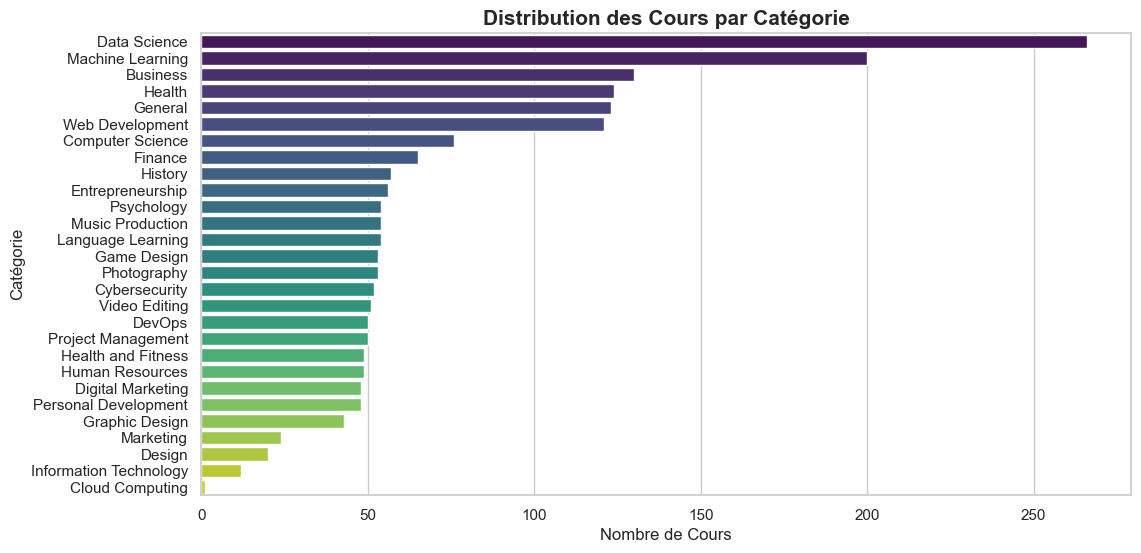

In [4]:
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Distribution des Cours par Catégorie', fontsize=15, fontweight='bold')
plt.xlabel('Nombre de Cours')
plt.ylabel('Catégorie')
plt.show()

## 3. Analyse des Notes (Ratings)
Comment les cours sont-ils notés par les utilisateurs ?

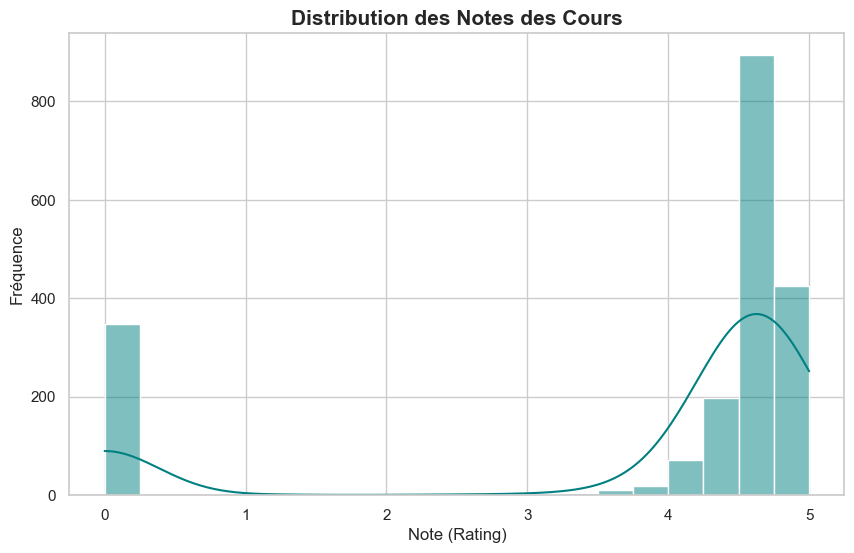

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='teal')
plt.title('Distribution des Notes des Cours', fontsize=15, fontweight='bold')
plt.xlabel('Note (Rating)')
plt.ylabel('Fréquence')
plt.show()

## 4. Popularité vs Note
Existe-t-il une corrélation entre le score de popularité et la note du cours ?

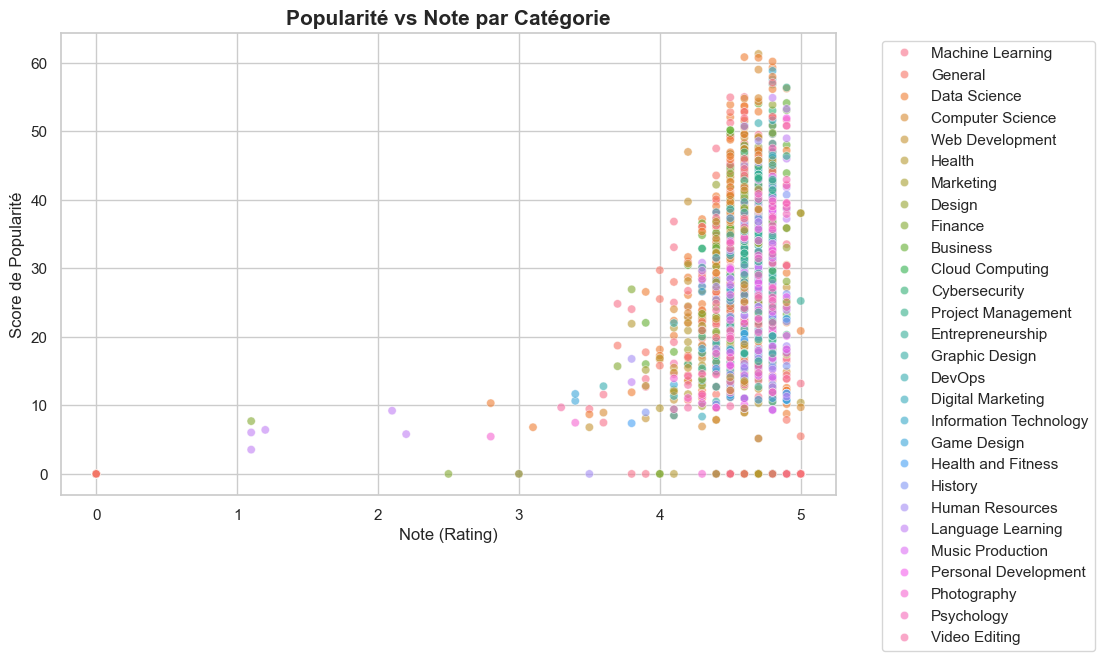

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='popularity_score', hue='category', alpha=0.6)
plt.title('Popularité vs Note par Catégorie', fontsize=15, fontweight='bold')
plt.xlabel('Note (Rating)')
plt.ylabel('Score de Popularité')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Top 10 des Partenaires (Universités/Entreprises)
Quelles institutions proposent le plus de cours ?

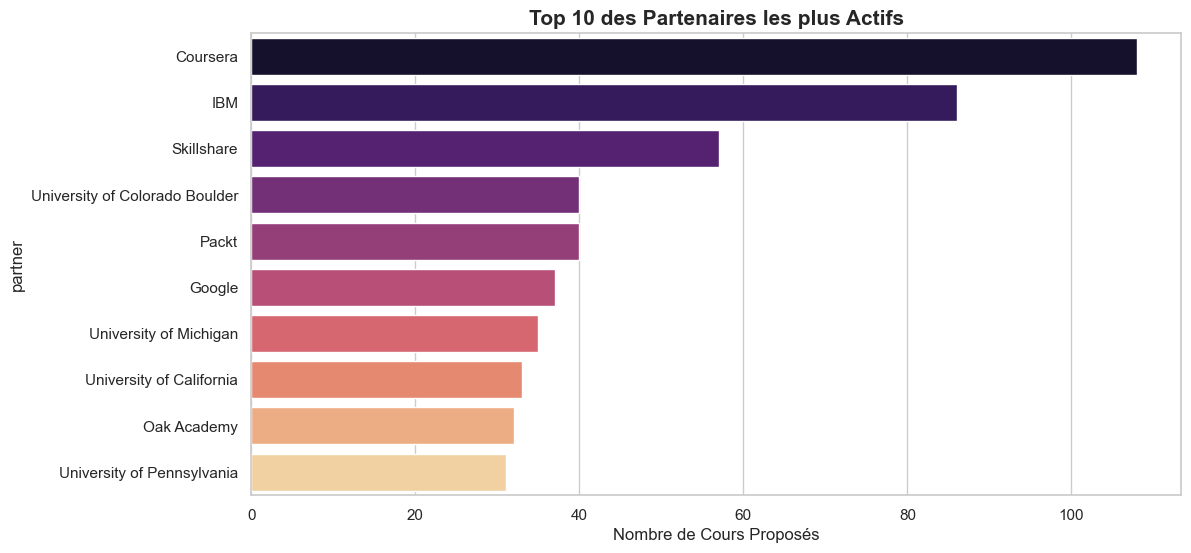

In [7]:
plt.figure(figsize=(12, 6))
top_partners = df['partner'].value_counts().head(10)
sns.barplot(x=top_partners.values, y=top_partners.index, palette="magma")
plt.title('Top 10 des Partenaires les plus Actifs', fontsize=15, fontweight='bold')
plt.xlabel('Nombre de Cours Proposés')
plt.show()

## 6. Niveau des Cours (Expertise)
Répartition des niveaux de difficulté.

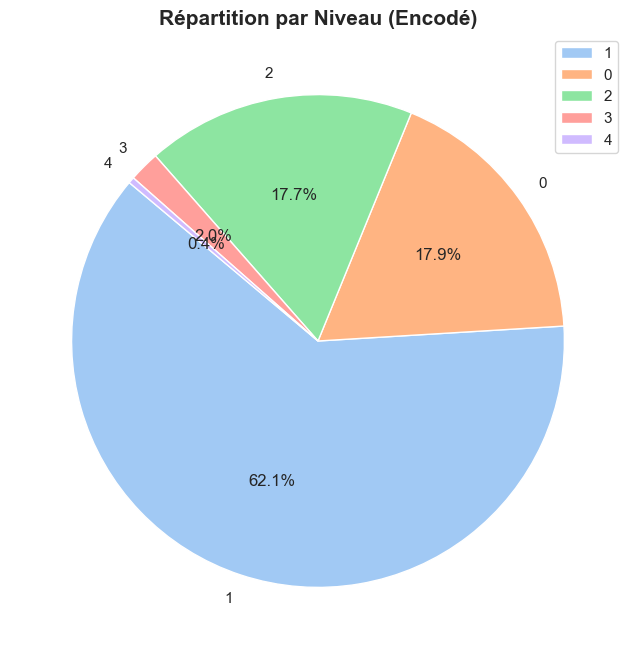

In [9]:
plt.figure(figsize=(8, 8))
level_counts = df['level_enc'].value_counts()
# On peut mapper les labels si on connaît l'encodage (1: Beginner, 2: Intermediate, etc. par exemple)
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Répartition par Niveau (Encodé)', fontsize=15, fontweight='bold')
plt.legend()
plt.show()

## 7. Analyse de la Durée des Cours
Quelle est la durée moyenne des formations ?

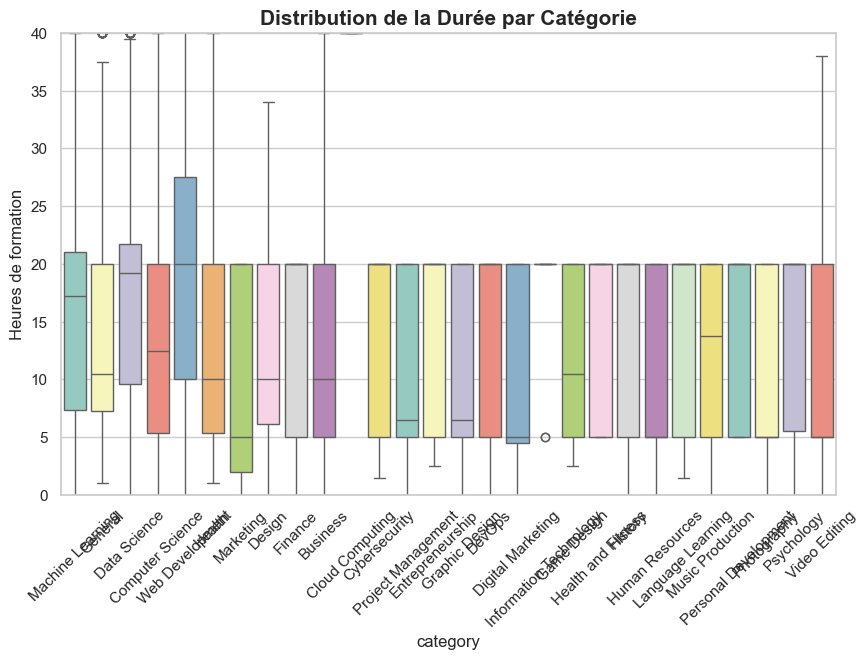

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='duration_hours', data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Distribution de la Durée par Catégorie', fontsize=15, fontweight='bold')
plt.ylabel('Heures de formation')
plt.ylim(0, df['duration_hours'].quantile(0.95)) # On limite pour éviter les outliers extrêmes
plt.show()

## 8. Source des Données (Domaines)
Comparaison entre Coursera, Udemy, etc.

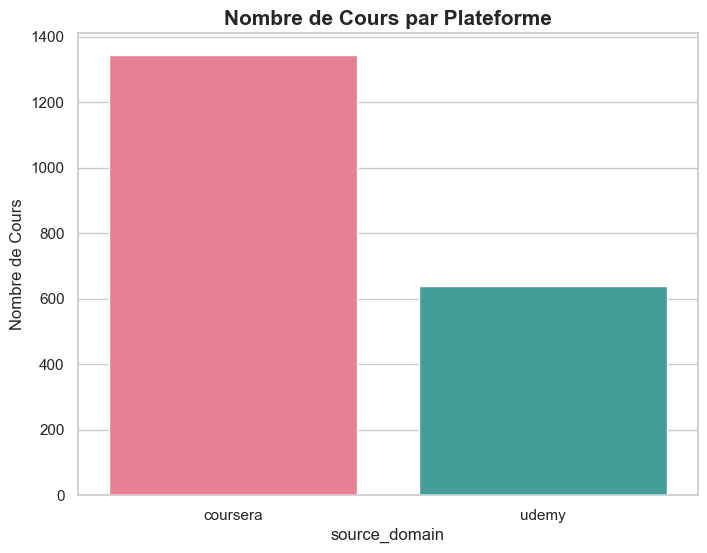

In [11]:
plt.figure(figsize=(8, 6))
source_counts = df['source_domain'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values, palette="husl")
plt.title('Nombre de Cours par Plateforme', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de Cours')
plt.show()

## Conclusion
Cette analyse nous permet de voir que :
- Certaines catégories dominent le catalogue.
- La majorité des cours ont des notes très élevées (concentrées entre 4.0 et 5.0).
- Les partenaires comme IBM, Google ou certaines universités majeures sont les principaux fournisseurs.
- On observe une grande variété dans la durée des cours selon les catégories.